# Mutual information exploration

In [1]:
import numpy as np
import xarray as xr

from tqdm.notebook import tqdm

from matplotlib import pyplot as plt

from frites.simulations import sim_multi_suj_ephy
from frites.dataset import DatasetEphy
from frites.workflow import WfMi
from frites import set_mpl_style

set_mpl_style()

np.random.seed(0)

### Continuous;Continuous

In [2]:
from frites.simulations import sim_mi_cc

In [3]:
modality = 'meeg'
n_subjects = 5
n_epochs = 400
n_times = 100
x, roi, time = sim_multi_suj_ephy(n_subjects=n_subjects, n_epochs=n_epochs,
                                  n_times=n_times, modality=modality,
                                  random_state=0)

In [4]:
sl = slice(40, 60)
y = [x[k][..., sl].mean(axis=(1, 2)) for k in range(len(x))]
dt = DatasetEphy(x.copy(), y=y, roi=roi, times=time)

Definition of an electrophysiological dataset
    Dataset composed of 5 subjects / sessions
    At least False subjects / roi required
    Supported MI definition I(x; y (continuous)) (cc)


Gaussian Copula Mutual Information Estimator (mi_type=cc, copnorm=False, biascorrect=True, demeaned=False)
Definition of a non-parametric statistical workflow
Workflow for computing mutual information (inference=ffx, mi_type=cc, copnorm=True)
    Evaluate true and permuted mi (n_perm=0, n_jobs=-1)
c:\Users\chris\Documents\cflab\itpg\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████| Estimating MI : 1/1 [00:00<00:00,    7.13it/s]


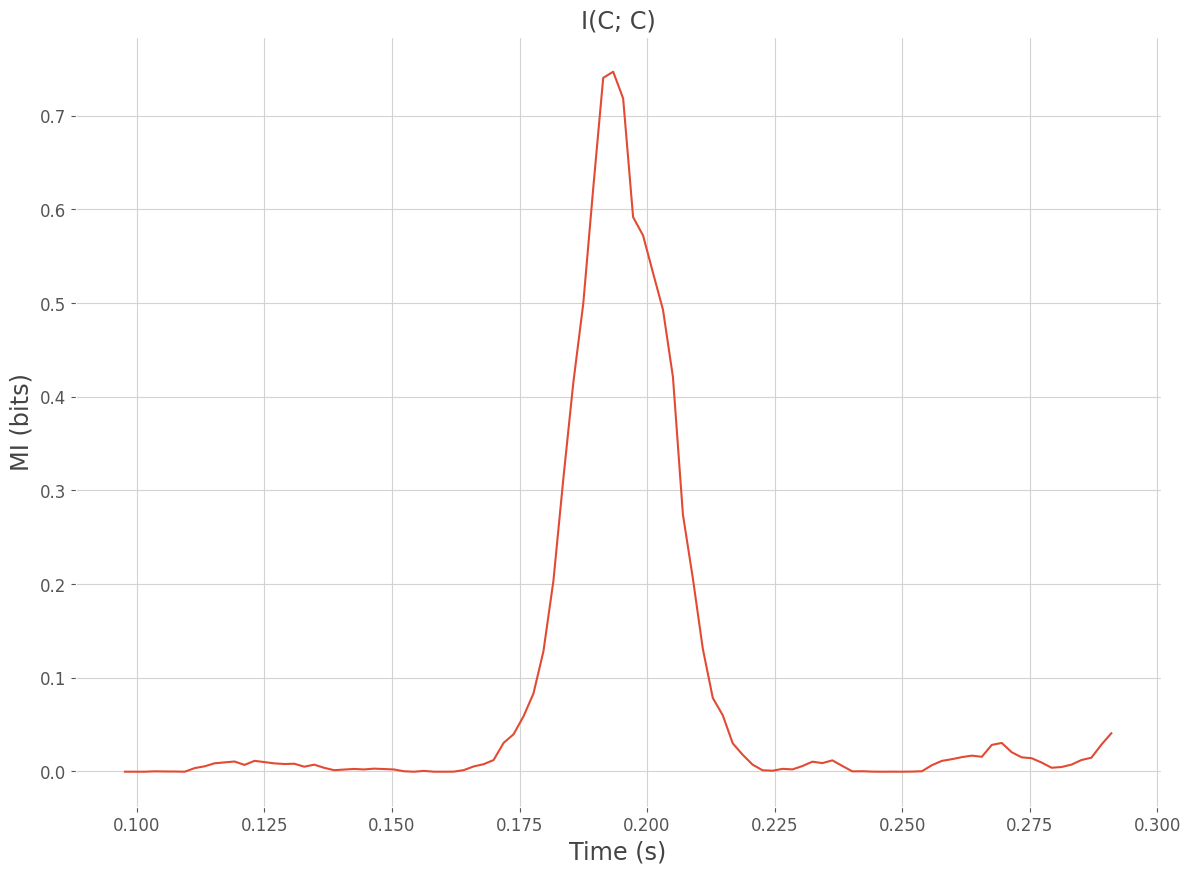

In [7]:
# mutual information type ('cc' = continuous / continuous)
mi_type = 'cc'

# define the workflow
wf = WfMi(mi_type, inference='ffx')
# compute the mutual information without permutations
mi, _ = wf.fit(dt, mcp=None)

# plot the information shared between the data and the regressor y
plt.plot(time, mi)
plt.xlabel("Time (s)"), plt.ylabel("MI (bits)")
plt.title('I(C; C)')
plt.show()

Definition of an electrophysiological dataset
    Dataset composed of 5 subjects / sessions
    At least False subjects / roi required
    Supported MI definition I(x; y (continuous)) (cc)
Gaussian Copula Mutual Information Estimator (mi_type=cc, copnorm=False, biascorrect=True, demeaned=False)
Definition of a non-parametric statistical workflow
Workflow for computing mutual information (inference=ffx, mi_type=cc, copnorm=True)
    Evaluate true and permuted mi (n_perm=200, n_jobs=1)
100%|██████████| Estimating MI : 1/1 [00:01<00:00,    1.01s/it]
    Fixed-effect inference (FFX)
    Cluster forming threshold (tail=1; alpha=0.05; tfce=True)
    Inference at cluster-level
    Cluster detection (threshold={'start': 0.0010303998, 'step': 0.0002696499414741993, 'e_power': 0.5, 'h_power': 2}; tail=1)
Definition of an electrophysiological dataset
    Dataset composed of 5 subjects / sessions
    At least False subjects / roi required
    Supported MI definition I(x; y (continuous)) (cc)
Gauss

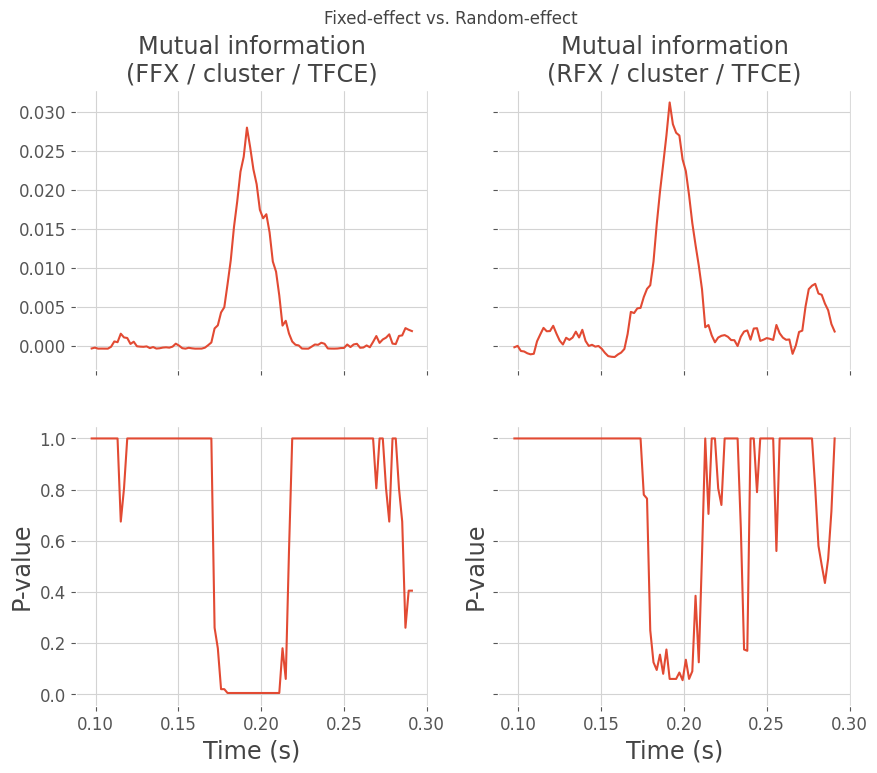

In [8]:
mi_type = 'cc'
n_perm = 200
y, _ = sim_mi_cc(x, snr=.1)

# within subject statistics (ffx=fixed-effect)
ffx_stat = 'ffx_cluster_tfce'
dt_ffx = DatasetEphy(x.copy(), y=y, roi=roi, times=time)
wf_ffx = WfMi(mi_type=mi_type, inference='ffx')
mi_ffx, pv_ffx = wf_ffx.fit(dt_ffx, mcp='cluster', cluster_th='tfce',
                            n_perm=n_perm, n_jobs=1)

# between-subject statistics (rfx=random-effect)
dt_rfx = DatasetEphy(x.copy(), y=y, roi=roi, times=time)
wf_rfx = WfMi(mi_type=mi_type, inference='rfx')
mi_rfx, pv_rfx = wf_rfx.fit(dt_rfx, mcp='cluster', cluster_th='tfce',
                            n_perm=n_perm, n_jobs=1)

# plot the comparison
fig, axs = plt.subplots(nrows=2, ncols=2, sharex=True, sharey='row',
                        figsize=(10, 8))
fig.suptitle("Fixed-effect vs. Random-effect")

plt.sca(axs[0, 0])
plt.plot(time, mi_ffx)
plt.title(f"Mutual information\n(FFX / cluster / TFCE)")
plt.sca(axs[1, 0])
plt.plot(time, pv_ffx)
plt.xlabel("Time (s)"), plt.ylabel("P-value")
plt.sca(axs[0, 1])
plt.plot(time, mi_rfx)
plt.title(f"Mutual information\n(RFX / cluster / TFCE)")
plt.sca(axs[1, 1])
plt.plot(time, pv_rfx)
plt.xlabel("Time (s)"), plt.ylabel("P-value")
plt.show()

### Continuous;Discret

In [9]:
from frites.simulations import sim_mi_cd

In [11]:
modality = 'meeg'
n_subjects = 5
n_epochs = 400
n_times = 100
x, roi, time = sim_multi_suj_ephy(n_subjects=n_subjects, n_epochs=n_epochs,
                                  n_times=n_times, modality=modality,
                                  random_state=0)
x, y, _ = sim_mi_cd(x, snr=1., n_conditions=3)
dt = DatasetEphy(x, y=y, roi=roi, times=time)

Definition of an electrophysiological dataset
    Dataset composed of 5 subjects / sessions
    At least False subjects / roi required
    Supported MI definition I(x; y (discret)) (cd)


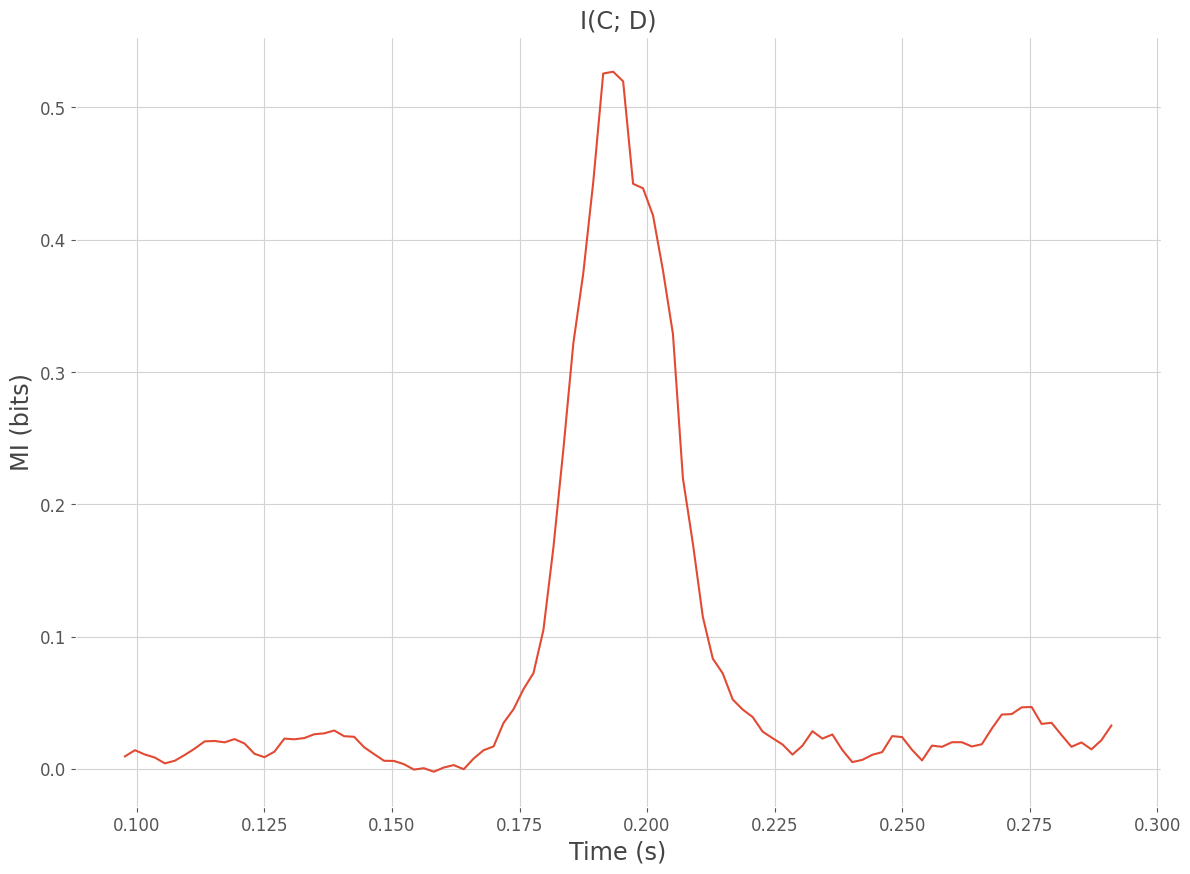

In [12]:
# mutual information type ('cd' = continuous / discret)
mi_type = 'cd'

# define the workflow
wf = WfMi(mi_type=mi_type, verbose=False)
# compute the mutual information
mi, _ = wf.fit(dt, mcp=None, n_jobs=1)

# plot the information shared between the data and the regressor y
plt.plot(time, mi)
plt.xlabel("Time (s)"), plt.ylabel("MI (bits)")
plt.title('I(C; D)')
plt.show()

### Continuous;Continuous|Discret

In [13]:
from frites.simulations import sim_mi_ccd

In [14]:
modality = 'meeg'
n_subjects = 5
n_epochs = 400
n_times = 100
x, roi, time = sim_multi_suj_ephy(n_subjects=n_subjects, n_epochs=n_epochs,
                                  n_times=n_times, modality=modality,
                                  random_state=0)
y, z, _ = sim_mi_ccd(x, snr=1.)
dt = DatasetEphy(x, y=y, roi=roi, z=z, times=time)

Definition of an electrophysiological dataset
    Dataset composed of 5 subjects / sessions
    At least False subjects / roi required
    Supported MI definition I(x; y (continuous)) | z (discret) (ccd)


Gaussian Copula Mutual Information Estimator (mi_type=ccd, copnorm=False, biascorrect=True, demeaned=False)
Definition of a non-parametric statistical workflow
Workflow for computing mutual information (inference=rfx, mi_type=ccd, copnorm=True)
    Evaluate true and permuted mi (n_perm=0, n_jobs=1)
100%|██████████| Estimating MI : 1/1 [00:00<00:00,    8.69it/s]
    Mean mi across subjects


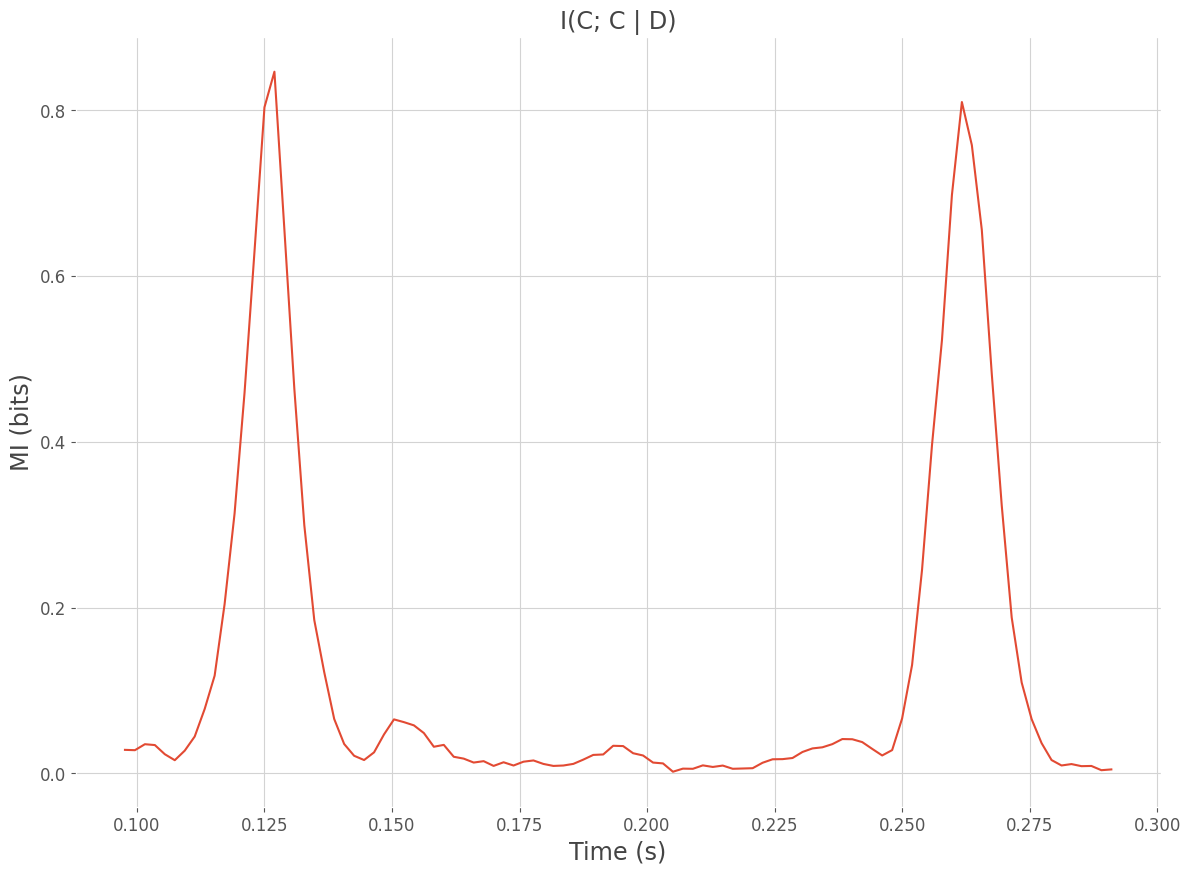

In [15]:
# mutual information type ('ccd' = continuous; continuous | discret)
mi_type = 'ccd'

# define the workflow
wf = WfMi(mi_type=mi_type)
# compute the mutual information
mi, _ = wf.fit(dt, mcp=None, n_jobs=1)

# plot the information shared between the data and the regressor y
plt.plot(time, mi)
plt.xlabel("Time (s)"), plt.ylabel("MI (bits)")
plt.title('I(C; C | D)')
plt.show()

### MI across time and frequencies

In [3]:
n_subjects = 5
n_freqs = 20
n_times = 50
n_trials = np.random.randint(50, 100, n_subjects)

In [4]:
def sim_single_subject(n_freqs, n_times, n_trials, noise_level=10.):
    # generate the mask modulating the amplitude of the gaussian
    t_range, f_range = np.linspace(-1, 1, n_times), np.linspace(-1, 1, n_freqs)
    x, y = np.meshgrid(t_range, f_range)
    d = np.sqrt(x * x + y * y)
    sigma, mu = 2.0, 0.0
    mask_2d = np.exp(-((d - mu) ** .5 / (2. * sigma ** .5)))
    # [0, 1] normalize the mask
    mask_2d -= mask_2d.min()
    mask_2d /= mask_2d.max()
    # turn the mask 3d
    mask_3d = np.tile(mask_2d[np.newaxis, ...], (n_trials, 1, 1))
    # generate the base data
    noise = np.random.uniform(0, noise_level, (n_trials, 1, 1))
    gauss = np.random.normal(0, 1, (n_trials))
    y = gauss.copy()
    gauss = np.tile(gauss.reshape(-1, 1, 1), (1, n_freqs, n_times))
    # data is finally defined as util signal + noise
    data = noise + gauss * mask_3d

    return data[:, np.newaxis, ...], y

In [5]:
x, y, roi = [], [], []
times = np.linspace(-1, 1, n_times)
freqs = np.linspace(60, 160, n_freqs)
for s, tr in zip(range(n_subjects), n_trials):
    # simulate the data coming from a single subject
    x_single_suj, y_single_suj = sim_single_subject(n_freqs, n_times, tr)
    # xarray conversion
    _x = xr.DataArray(x_single_suj, dims=('trials', 'roi', 'freqs', 'times'),
                      coords=(y_single_suj, ['roi_0'], freqs, times))
    x += [_x]

# define an instance of DatasetEphy
ds = DatasetEphy(x, y='trials', roi='roi', times='times')

Definition of an electrophysiological dataset
    Dataset composed of 5 subjects / sessions
    At least False subjects / roi required
    Supported MI definition I(x; y (continuous)) (cc)


Gaussian Copula Mutual Information Estimator (mi_type=cc, copnorm=False, biascorrect=True, demeaned=False)
Definition of a non-parametric statistical workflow
Workflow for computing mutual information (inference=ffx, mi_type=cc, copnorm=True)
    Evaluate true and permuted mi (n_perm=200, n_jobs=1)
c:\Users\chris\Documents\cflab\itpg\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████| Estimating MI : 1/1 [00:01<00:00,    1.26s/it]
    Fixed-effect inference (FFX)
    Cluster forming threshold (tail=1; alpha=0.05; tfce=None)
    Inference at cluster-level
    Cluster detection (threshold=0.004862661007791758; tail=1)


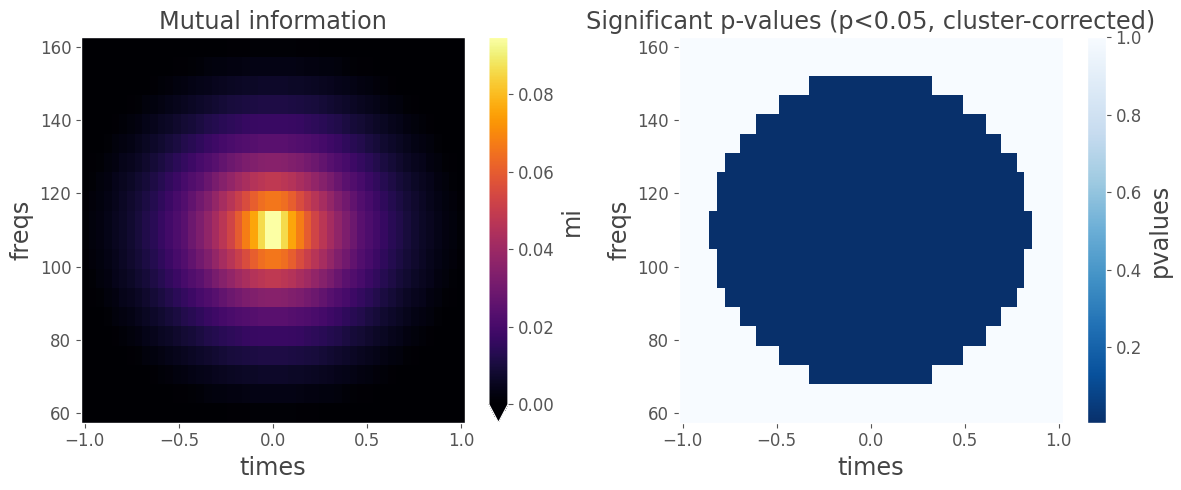

In [6]:
# compute the mutual information
wf = WfMi(inference='ffx', mi_type='cc')
mi, pv = wf.fit(ds, n_perm=200, mcp='cluster', random_state=0, n_jobs=1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
mi.squeeze().plot.pcolormesh(vmin=0, cmap='inferno')
plt.title('Mutual information')
plt.subplot(1, 2, 2)
pv.squeeze().plot.pcolormesh(cmap='Blues_r')
plt.title('Significant p-values (p<0.05, cluster-corrected)')
plt.tight_layout()

### MI at the contact level

#### Continuous;Continuous

Definition of an electrophysiological dataset
    Dataset composed of 3 subjects / sessions
    At least False subjects / roi required
    Supported MI definition I(x; y (continuous)) (cc)
Gaussian Copula Mutual Information Estimator (mi_type=cc, copnorm=False, biascorrect=True, demeaned=False)
Definition of a non-parametric statistical workflow
Workflow for computing mutual information (inference=rfx, mi_type=cc, copnorm=True)
    Evaluate true and permuted mi (n_perm=0, n_jobs=-1)
100%|██████████| Estimating MI : 1/1 [00:00<00:00,   30.93it/s]
    Mean mi across subjects
Definition of an electrophysiological dataset
    Dataset composed of 3 subjects / sessions
    At least False subjects / roi required
    Supported MI definition I(x; y (continuous)) (cc)
Gaussian Copula Mutual Information Estimator (mi_type=ccd, copnorm=False, biascorrect=True, demeaned=False)
Definition of a non-parametric statistical workflow
Workflow for computing mutual information (inference=rfx, mi_type=ccd, 

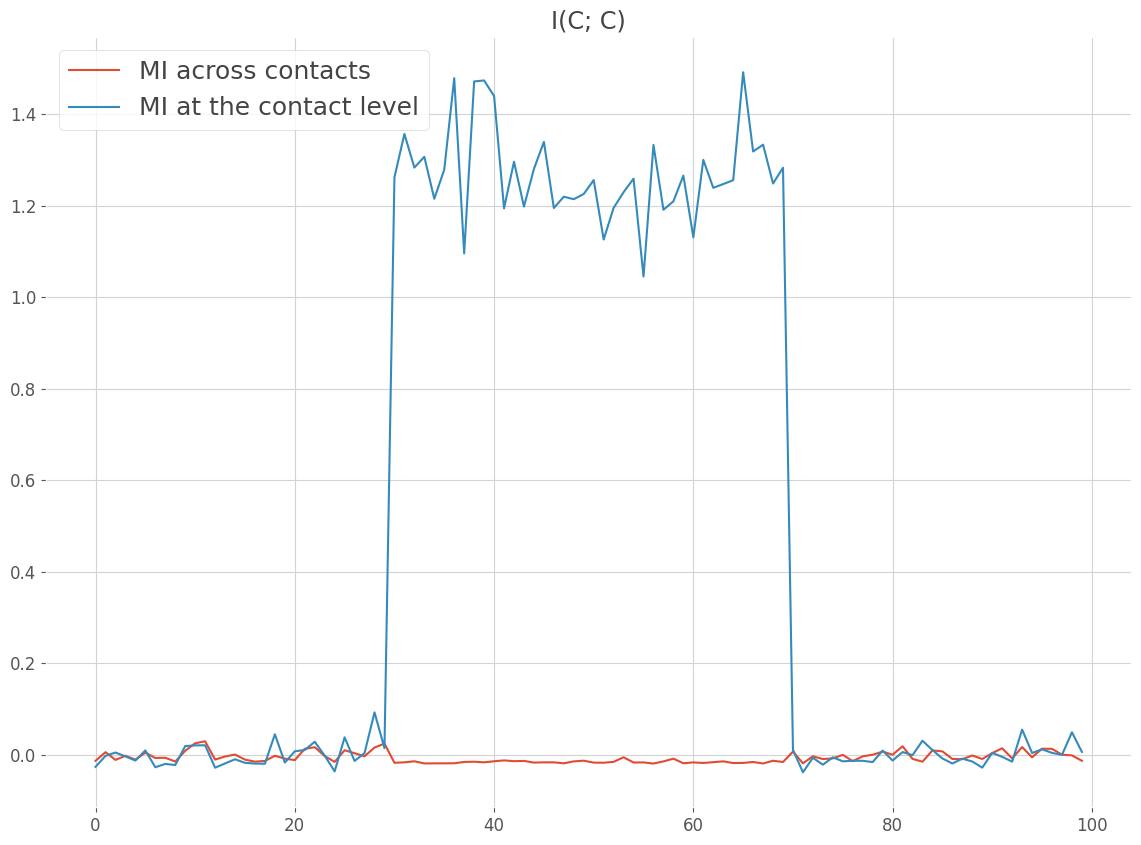

In [10]:
n_suj = 3
n_trials = 20
n_times = 100
half = int(n_trials / 2)
times = np.arange(n_times)

x, y, roi = [], [], []
for suj in range(n_suj):
    # initialize subject's data with random noise
    _x = np.random.rand(n_trials, 2, n_times)
    # normal continuous regressor
    _y = np.random.normal(size=(n_trials,))

    # first contact has positive correlations
    _x[:, 0, slice(30, 70)] += _y.reshape(-1, 1)
    # second contact has negative correlations
    _x[:, 1, slice(30, 70)] -= _y.reshape(-1, 1)

    x += [_x]
    y += [_y]
    roi += [np.array(['roi_0', 'roi_0'])]

# now, compute the mi with default parameters
ds = DatasetEphy(x, y=y, roi=roi, times=times, agg_ch=True)
mi = WfMi(mi_type='cc').fit(ds, mcp='noperm')[0]

# compute the mi at the contact level
ds = DatasetEphy(x, y=y, roi=roi, times=times, agg_ch=False)
mi_c = WfMi(mi_type='ccd').fit(ds, mcp='noperm')[0]

# plot the comparison
plt.figure()
plt.plot(times, mi, label="MI across contacts")
plt.plot(times, mi_c, label="MI at the contact level")
plt.legend()
plt.title('I(C; C)')
plt.show()

Definition of an electrophysiological dataset
    Dataset composed of 3 subjects / sessions
    At least False subjects / roi required
    Supported MI definition I(x; y (discret)) (cd)
Gaussian Copula Mutual Information Estimator (mi_type=cd, copnorm=False, biascorrect=True, demeaned=False)
Definition of a non-parametric statistical workflow
Workflow for computing mutual information (inference=rfx, mi_type=cd, copnorm=True)
    Evaluate true and permuted mi (n_perm=0, n_jobs=-1)
100%|██████████| Estimating MI : 1/1 [00:00<00:00,   17.70it/s]
    Mean mi across subjects
Definition of an electrophysiological dataset
    Dataset composed of 3 subjects / sessions
    At least False subjects / roi required
    Supported MI definition I(x; y (discret)) (cd)
Gaussian Copula Mutual Information Estimator (mi_type=cd, copnorm=False, biascorrect=True, demeaned=False)
Definition of a non-parametric statistical workflow
Workflow for computing mutual information (inference=rfx, mi_type=cd, copnorm=

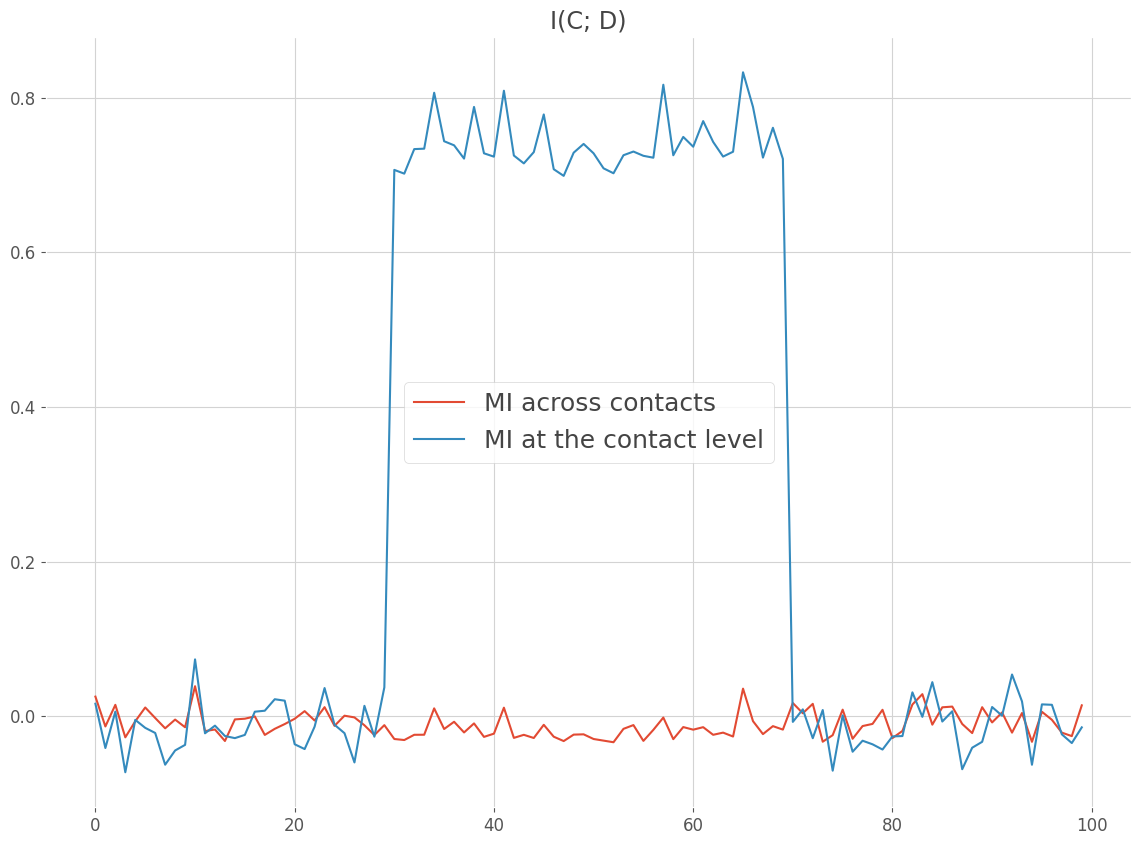

In [8]:
n_suj = 3
n_trials = 20
n_times = 100
half = int(n_trials / 2)
times = np.arange(n_times)

x, y, roi = [], [], []
for suj in range(n_suj):
    # initialize subject's data with random noise
    _x = np.random.rand(n_trials, 2, n_times)
    # define a positive and negative offsets of 1
    _y_pos, _y_neg = np.full((half, 1), 1.), np.full((half, 1), -1.)

    # first contact / first half trials : positive offset
    _x[0:half, 0, slice(30, 70)] += _y_pos
    # first contact / second half trials : negative offset
    _x[half::, 0, slice(30, 70)] += _y_neg
    # second contact / first half trials : negative offset
    _x[0:half, 1, slice(30, 70)] += _y_neg
    # second contact / second half trials : positive offset
    _x[half::, 1, slice(30, 70)] += _y_pos

    x += [_x]
    y += [np.array([0] * half + [1] * half)]
    roi += [np.array(['roi_0', 'roi_0'])]
times = np.arange(n_times)

# now, compute the mi with default parameters
ds = DatasetEphy(x, y=y, roi=roi, times=times)
mi = WfMi(mi_type='cd').fit(ds, mcp='noperm')[0]

# compute the mi at the contact level
ds = DatasetEphy(x, y=y, roi=roi, times=times, agg_ch=False)
mi_c = WfMi(mi_type='cd').fit(ds, mcp='noperm')[0]

# plot the comparison
plt.figure()
plt.plot(times, mi, label="MI across contacts")
plt.plot(times, mi_c, label="MI at the contact level")
plt.legend()
plt.title('I(C; D)')
plt.show()

#### Continuous;Continuous|Discret

Definition of an electrophysiological dataset
    Dataset composed of 3 subjects / sessions
    At least False subjects / roi required
    Supported MI definition I(x; y (continuous)) | z (discret) (ccd)
Gaussian Copula Mutual Information Estimator (mi_type=ccd, copnorm=False, biascorrect=True, demeaned=False)
Definition of a non-parametric statistical workflow
Workflow for computing mutual information (inference=rfx, mi_type=ccd, copnorm=True)
    Evaluate true and permuted mi (n_perm=0, n_jobs=-1)
100%|██████████| Estimating MI : 1/1 [00:00<00:00,   31.36it/s]
    Mean mi across subjects
Definition of an electrophysiological dataset
    Dataset composed of 3 subjects / sessions
    At least False subjects / roi required
    Supported MI definition I(x; y (continuous)) | z (discret) (ccd)
Gaussian Copula Mutual Information Estimator (mi_type=ccd, copnorm=False, biascorrect=True, demeaned=False)
Definition of a non-parametric statistical workflow
Workflow for computing mutual informati

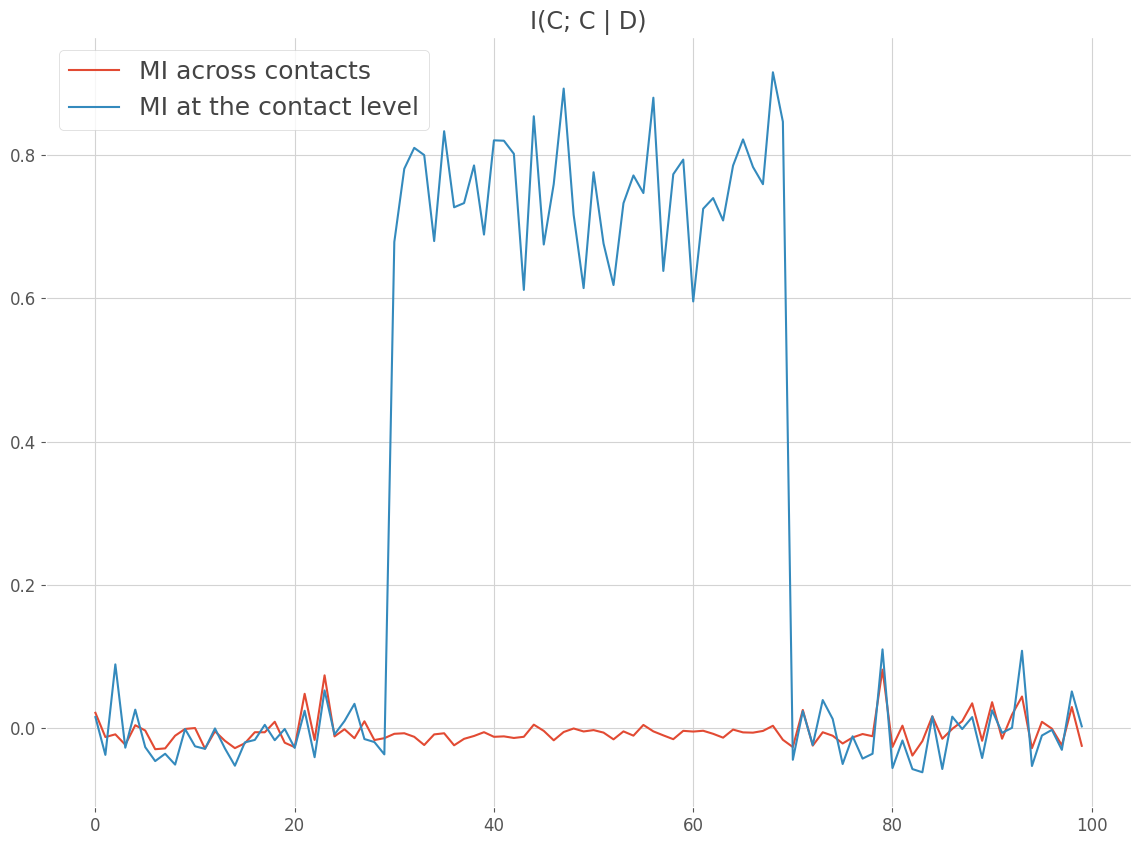

In [11]:
x, y, z, roi = [], [], [], []
for suj in range(n_suj):
    # initialize subject's data with random noise
    _x = np.random.rand(n_trials, 2, n_times)
    # define a positive and negative correlations
    _y_pos = np.random.normal(loc=1, size=(half))
    _y_neg = np.random.normal(loc=-1, size=(half))
    _y = np.r_[_y_pos, _y_neg]
    _z = np.array([0] * half + [1] * half)

    # first contact / first half trials : positive offset
    _x[0:half, 0, slice(30, 70)] += _y_pos.reshape(-1, 1)
    # first contact / second half trials : negative offset
    _x[half::, 0, slice(30, 70)] += _y_neg.reshape(-1, 1)
    # second contact / first half trials : negative offset
    _x[0:half, 1, slice(30, 70)] += _y_neg.reshape(-1, 1)
    # second contact / second half trials : positive offset
    _x[half::, 1, slice(30, 70)] += _y_pos.reshape(-1, 1)

    x += [_x]
    y += [_y]
    z += [_z]
    roi += [np.array(['roi_0', 'roi_0'])]
times = np.arange(n_times)

# now, compute the mi with default parameters
ds = DatasetEphy(x, y=y, z=z, roi=roi, times=times)
mi = WfMi(mi_type='ccd').fit(ds, mcp='noperm')[0]

# compute the mi at the contact level
ds = DatasetEphy(x, y=y, z=z, roi=roi, times=times, agg_ch=False)
mi_c = WfMi(mi_type='ccd').fit(ds, mcp='noperm')[0]

# plot the comparison
plt.figure()
plt.plot(times, mi, label="MI across contacts")
plt.plot(times, mi_c, label="MI at the contact level")
plt.legend()
plt.title('I(C; C | D)')
plt.show()